In [5]:
file_size = 1509949440  # size of file in bytes
width, height = 512, 512  # dimensions of each slice
channels = 1  # assuming grayscale

# Calculate depth
depth = file_size // (width * height * channels)
print(f"Calculated depth: {depth}")


Calculated depth: 5760


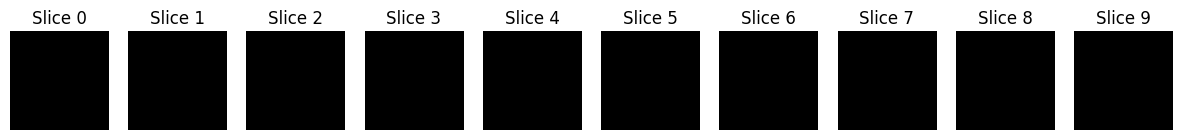

In [6]:
depth = 5760  

# Load raw file data
file_path = "/Users/sp00n/Desktop/DSCI CAMP/scan_001.raw"
raw_data = np.fromfile(file_path, dtype=np.uint8)

# Reshape data into a 3D array with the calculated depth
volume = raw_data.reshape((depth, height, width))

# Convert the NumPy array to a PyTorch tensor
volume_tensor = torch.tensor(volume, dtype=torch.float32)

# Normalize and visualize
volume_tensor = (volume_tensor - volume_tensor.min()) / (volume_tensor.max() - volume_tensor.min())

# Visualize a few slices along the depth axis
def visualize_slices(volume, axis=0):
    num_slices = min(10, volume.shape[axis])
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 15))

    for i in range(num_slices):
        if axis == 0:
            slice_img = volume[i, :, :].numpy()
        elif axis == 1:
            slice_img = volume[:, i, :].numpy()
        else:
            slice_img = volume[:, :, i].numpy()

        axes[i].imshow(slice_img, cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(f"Slice {i}")

    plt.show()

# Visualize slices along the depth axis
visualize_slices(volume_tensor, axis=0)